# 4.1 Policy Evaluation

In [3]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

In [5]:
import gym
from gym import spaces
from gym.utils import seeding

def map_to_coordinates(number):
  row = number // 4
  col = number % 4
  return [row, col]

In [116]:

class GridWorldEnv(gym.Env):
    def __init__(self, grid_size=(4,4)):
        super().__init__()
        self.grid_size = grid_size
        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Discrete(np.prod(grid_size))
        self.state = np.zeros(grid_size)
        self.state[0,0] = 1

    
    def step(self, action):
        x,y = self.get_pos()
        if action==0 and y > 0:
            #left side and moved left
            y -= 1
        elif action == 1 and x > 0:
            #top side and moved up
            x -=1
        elif action == 2 and y < self.grid_size[1] - 1:
            y +=1
            #right side and moved right
        elif action == 3 and x < self.grid_size[0] - 1:
            #bottom side and moved down
            x += 1
            
        self.state = np.zeros(self.grid_size)
        self.state[x,y] = 1


        observation = self.state.flatten()
        reward = -1
        terminated = self.state[self.grid_size[0] - 1, self.grid_size[1] - 1] == 1 #no unpack in 3.11 :(
        truncated = False
        info = {}

        return observation, reward, terminated, truncated, info


    def reset(self, seed=None):
        super().reset(seed=seed)
        self.state = np.zeros(self.grid_size)
        self.state[0,0] = 1
        info = {}
        return self.state, info
    
    def render(self):
        img = np.zeros((*self.grid_size, 3))

        x,y = self.get_pos()
        img[x,y,:] = 1
        return img
    
    def display_render(self):
        plt.figure(figsize=(1,1))
        plt.imshow(self.render())
        plt.axis('off')
        plt.show()

    def close(self):
        pass
    
    def get_pos(self):
        
      x,y = np.where(self.state == 1)
      return x[0], y[0]


     


[-1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


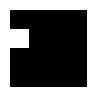

[-1.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


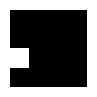

[-1.  0.  0.  0. -1.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.]


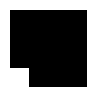

[-1.  0.  0.  0. -1.  0.  0.  0. -1.  0.  0.  0. -1.  0.  0.  0.]


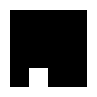

[-1.  0.  0.  0. -1.  0.  0.  0. -1.  0.  0.  0. -1. -1.  0.  0.]


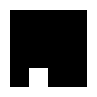

[-1.  0.  0.  0. -1.  0.  0.  0. -1.  0.  0.  0. -1. -3.  0.  0.]


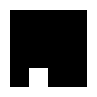

[-1.  0.  0.  0. -1.  0.  0.  0. -1.  0.  0.  0. -1. -4.  0.  0.]


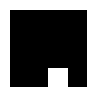

[-1.  0.  0.  0. -1.  0.  0.  0. -1.  0.  0.  0. -1. -4. -1.  0.]


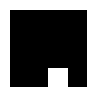

[-1.  0.  0.  0. -1.  0.  0.  0. -1.  0.  0.  0. -1. -4. -2.  0.]


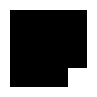

[-10.   0.   0.   0.  -1.   0.   0.   0.  -1.   0.   0.   0.  -1.  -4.
  -2.   0.]


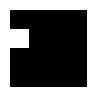

[-10.   0.   0.   0.  -2.   0.   0.   0.  -1.   0.   0.   0.  -1.  -4.
  -2.   0.]


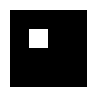

[-10.   0.   0.   0.  -2.  -1.   0.   0.  -1.   0.   0.   0.  -1.  -4.
  -2.   0.]


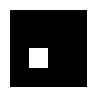

[-10.   0.   0.   0.  -2.  -1.   0.   0.  -1. -29.   0.   0.  -1.  -4.
  -2.   0.]


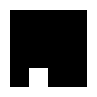

[-10.   0.   0.   0.  -2.  -1.   0.   0.  -1. -29.   0.   0.  -1. -16.
  -2.   0.]


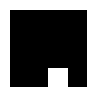

[-10.   0.   0.   0.  -2.  -1.   0.   0.  -1. -29.   0.   0.  -1. -16.
  -3.   0.]


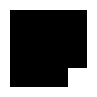

[-11.   0.   0.   0.  -2.  -1.   0.   0.  -1. -29.   0.   0.  -1. -16.
  -3.   0.]


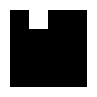

[-11.  -1.   0.   0.  -2.  -1.   0.   0.  -1. -29.   0.   0.  -1. -16.
  -3.   0.]


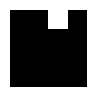

[-11.  -1.  -1.   0.  -2.  -1.   0.   0.  -1. -29.   0.   0.  -1. -16.
  -3.   0.]


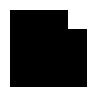

[-11.  -1.  -1.  -1.  -2.  -1.   0.   0.  -1. -29.   0.   0.  -1. -16.
  -3.   0.]


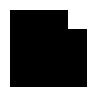

[-11.  -1.  -1.  -3.  -2.  -1.   0.   0.  -1. -29.   0.   0.  -1. -16.
  -3.   0.]


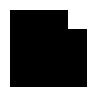

[-11.  -1.  -1.  -8.  -2.  -1.   0.   0.  -1. -29.   0.   0.  -1. -16.
  -3.   0.]


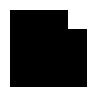

[-11.  -1.  -1.  -9.  -2.  -1.   0.   0.  -1. -29.   0.   0.  -1. -16.
  -3.   0.]


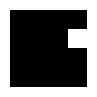

[-11.  -1.  -1.  -9.  -2.  -1.   0.  -1.  -1. -29.   0.   0.  -1. -16.
  -3.   0.]


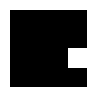

[-11.  -1.  -1.  -9.  -2.  -1.   0.  -1.  -1. -29.   0.  -1.  -1. -16.
  -3.   0.]


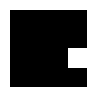

[-11.  -1.  -1.  -9.  -2.  -1.   0.  -1.  -1. -29.   0.  -2.  -1. -16.
  -3.   0.]


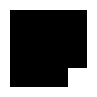

[-51.  -1.  -1.  -9.  -2.  -1.   0.  -1.  -1. -29.   0.  -2.  -1. -16.
  -3.   0.]


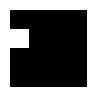

[-51.  -1.  -1.  -9. -27.  -1.   0.  -1.  -1. -29.   0.  -2.  -1. -16.
  -3.   0.]


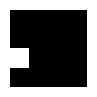

[-51.  -1.  -1.  -9. -27.  -1.   0.  -1. -26. -29.   0.  -2.  -1. -16.
  -3.   0.]


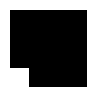

[ -51.   -1.   -1.   -9.  -27.   -1.    0.   -1.  -26.  -29.    0.   -2.
 -274.  -16.   -3.    0.]


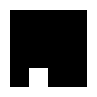

KeyboardInterrupt: 

In [130]:
import time
env = GridWorldEnv()
theta = 0.01
delta = None
v_pi = np.zeros(env.observation_space.n)
v_of_s = np.zeros(env.observation_space.n)
terminated = False
while delta == None or delta >= theta:
		delta = 0
		env.reset()
		for state in range(env.observation_space.n):
			v_pi += v_of_s
			action = env.action_space.sample()
			action = np.random.choice([2,3])
			s = env.state.argmax()
			obs, reward, terminated, _, _ = env.step(action)
			sprime = env.state.argmax()
			v_of_s[s] += reward + v_pi[sprime]
			max_change = max(np.abs(v_pi - v_of_s))
			delta = max(delta, max_change )
			print(v_of_s)
			env.display_render()
			time.sleep(1)

			if terminated:
				break
		

In [105]:
v_pi = np.zeros(env.observation_space.n)
v_pi

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [121]:
np.random.choice([2,3])

2